In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
plt.rcParams['figure.figsize'] = (14,4)

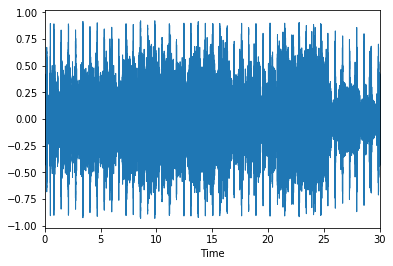

In [41]:
x, fs = librosa.load('Africa.mp3')
x = x[75*fs:fs*105]
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html

In [42]:
IPython.display.Audio(x, rate=fs)


In [43]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5,1,'Log-frequency power spectrogram')

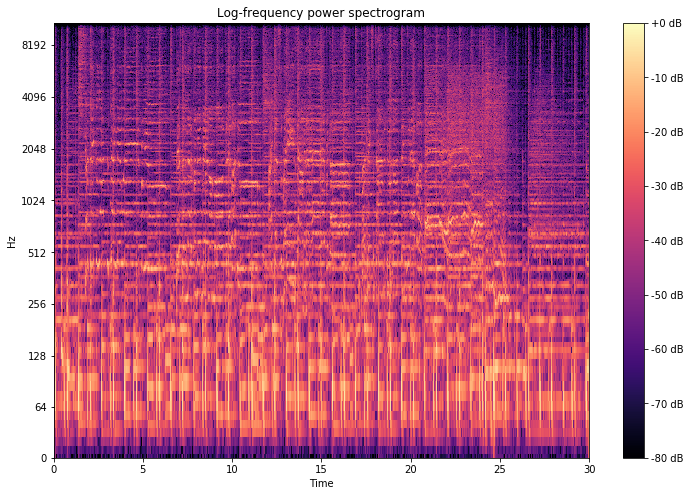

In [44]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

Text(0.5,1,'Linear-frequency power spectrogram')

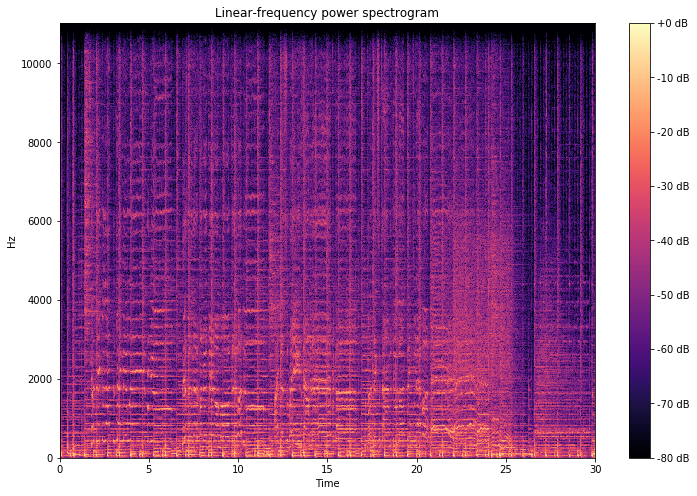

In [45]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [46]:
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc = 2048)
print mfccs.shape

(128, 1292)


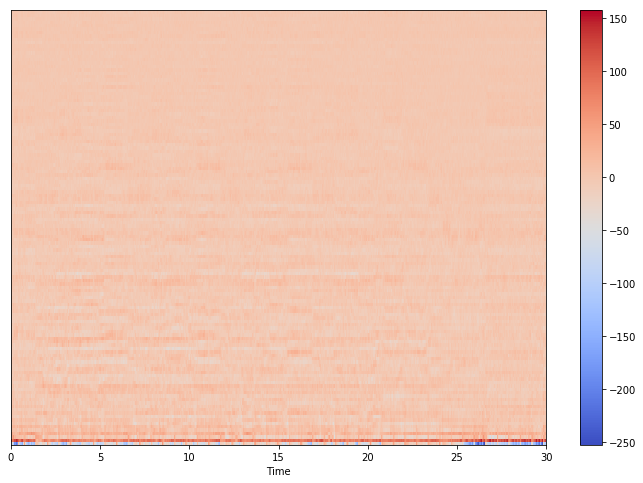

In [47]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [48]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#print mfccs.mean(axis=1)
#print mfccs.var(axis=1)

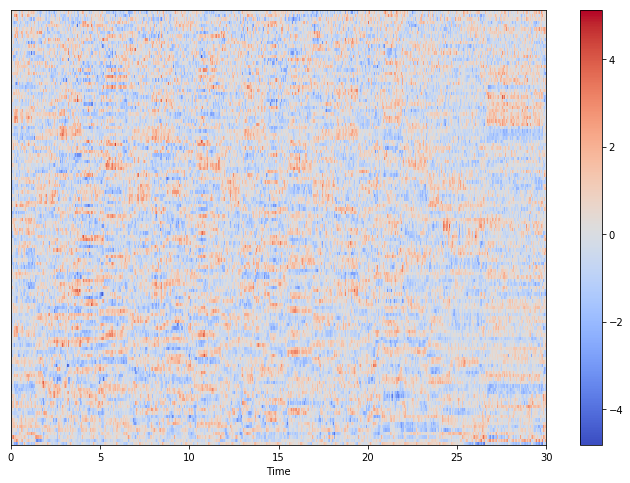

In [49]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [50]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

(1324, 13)


In [51]:
mfccs = sklearn.preprocessing.scale(mfccs)

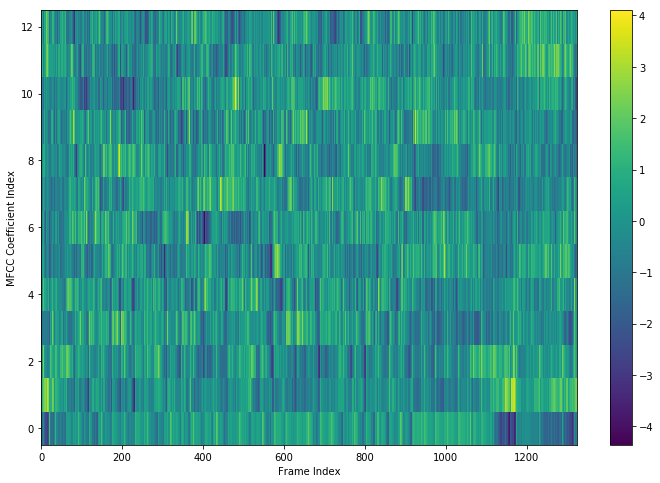

In [52]:
plt.figure(figsize=(12, 8))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

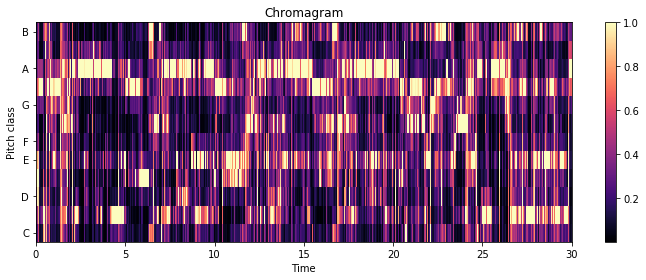

In [53]:
chroma = librosa.feature.chroma_stft(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

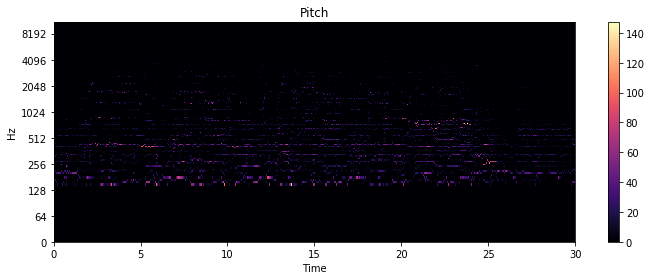

In [54]:
pitches, magnitudes = librosa.piptrack(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(magnitudes, y_axis = 'log', x_axis='time')
plt.colorbar()
plt.title('Pitch')
plt.tight_layout()

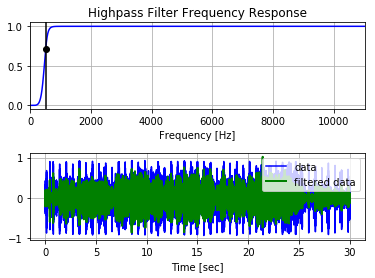

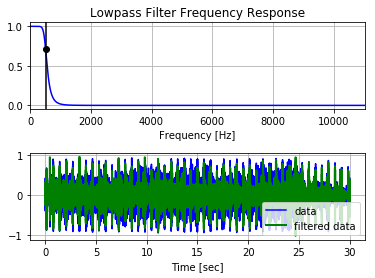

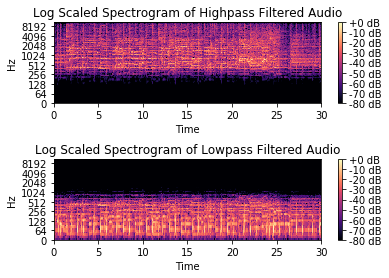

In [55]:
#filter audio signal

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = fs
cutoff = 512  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 30.0         # seconds
T = len(x)/fs
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = x

# Filter the data, and plot both the original and filtered signals.
x_hp_filtered = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, x_hp_filtered, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.figure()

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter the data, and plot both the original and filtered signals.
x_lp_filtered = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, x_lp_filtered, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

plt.figure()

plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_hp_filtered)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Log Scaled Spectrogram of Highpass Filtered Audio")

plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_lp_filtered)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Log Scaled Spectrogram of Lowpass Filtered Audio")

plt.subplots_adjust(hspace=0.7)
plt.show()

IPython.display.Audio(x_hp_filtered, rate=fs)

In [56]:
IPython.display.Audio(x_lp_filtered, rate=fs)

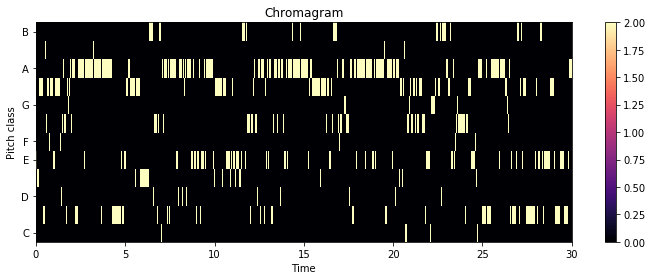

In [57]:
#original audio signal 

chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()
m, n = chroma.shape
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

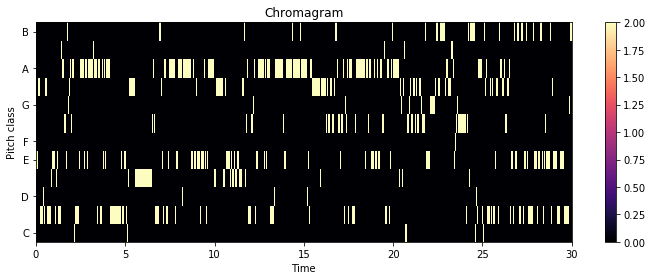

In [58]:
#chroma features for "melody only" highpass filtered audio data

chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)
chroma = chroma.transpose()
m, n = chroma.shape
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

7.7909541721573765


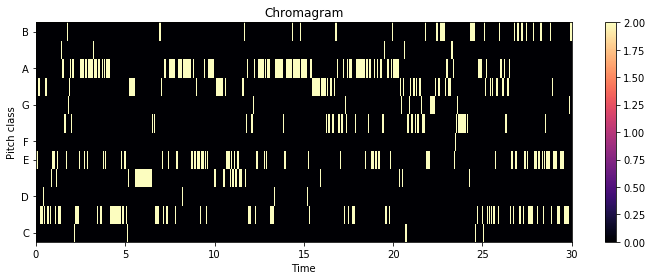

In [59]:
#chroma features for "melody only" highpass filtered audio data, now averaged, leave out "silence"

chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)
threshold = 300
m, n = chroma.shape

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg * 2 

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

92.28515625


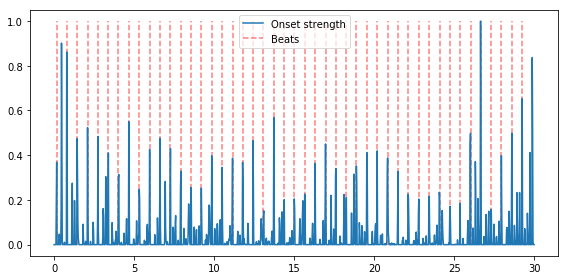

In [60]:
#beat estimation for unfiltered audio

tempo, beats = librosa.beat.beat_track(x, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
#plt.xlim(0, 10)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

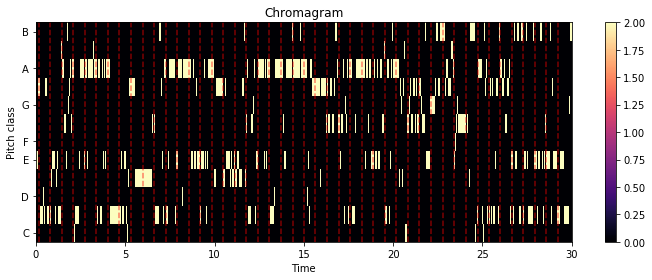

In [61]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

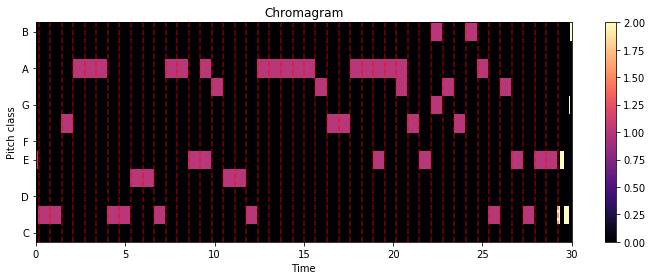

In [62]:
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

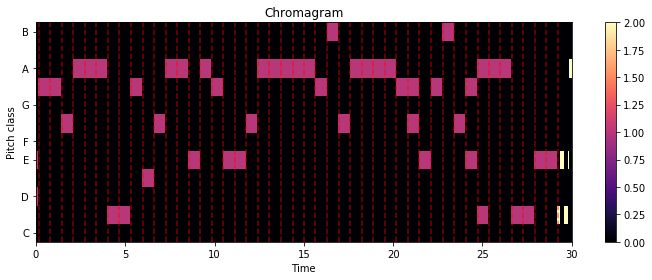

In [63]:
#original audio signal beat aligned

chroma = librosa.feature.chroma_stft(x, fs)
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()


92.28515625


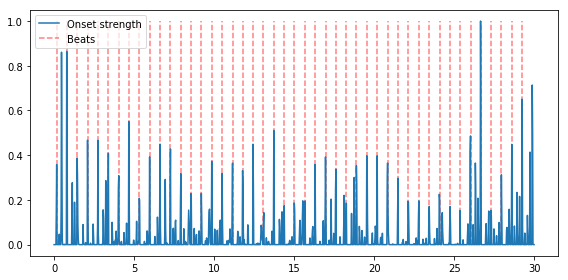

In [64]:
#beat estimation for lowpass filtered audio

tempo, beats = librosa.beat.beat_track(x_hp_filtered, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x_hp_filtered, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
#plt.xlim(0, 10)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()